# MATEMATIČKI SOFTVER, ZADAĆA 1. 
# OPTIMIZACIJA PORTFELJA 
Portfelj je skup dionica, obveznica ili bilo kakvih financijskih instrumenata koji imaju neku vrijednost. Cilj ove zadaće je proučiti neke metode optimizacije portfelja za **unaprijed fiksiran** portfelj, primjeniti ih na period od 2012. do 2016. te proučiti njihove rezultate u 2017. godine. Dodatno uspoređujemo njihove prinose ih s tzv. *benchmarkom* najpopularnijim dioničkim indeksom S&P 500. 

Cilj nam je otkriti koja je metoda najefikasnija bila u 2017. te "pobijediti" S&P 500. Na kraju ćemo za jednu metodu usporediti rezultate optimizacije ako prinose gledamo na mjesečnoj i godišnjoj razini.
Prvo učitavamo podatke s Yahoo Finance-a, te ih pripremamo za optimizacije računajući prinose i ostale parametre.
Nadalje, računamo udjele instrumenata u našem portfelju za više metoda.
U idućoj fazi uspoređujemo performansu naših portfelja s naglaskom na vizualizaciju.

Naš portfelj će činiti sljedeći objekti:
* Amazon (AMZN)
* Bitcoin (BTC)
* The Coca-Cola Company (KO)
* JPMorgan Chase & Co (JPM)
* Boeing Company (BA) 
* Visa Inc (V) 
* Johnson&Johnson (JNJ)



## Učitavanje i priprema podataka

In [261]:
import matplotlib.pyplot as plt
import pandas as pd
 
def ucitaj(x):
    y="%s.csv"%x
    z=pd.read_csv(y)
    del z['High'],z['Low'],z['Close'],z['Adj Close'],z['Volume']
    z.drop(0, inplace=True)
    z.rename(columns={'Open':'Price'},inplace=True)
    return z

In [262]:
import numpy as np

def povrat(x):
    y=np.linspace(0,0,59)
    for i in range(1,60):
        y[i-1]=(x['Price'][i+1]-x['Price'][i])/(x['Price'][i])*100
    return y

In [285]:
port=['AMZN','BTC','KO','JPM','BA','V','JNJ']
z={p : povrat(ucitaj(p)) for p in port}

## Provođenje metoda

### Portfelj 1: Equal Weight 
Najjednostavnija vrsta je da od svih 7 uzmemo jednak udio svakog instrumenata u našem portfelju i da to bude naša strategija za 2017. godinu.

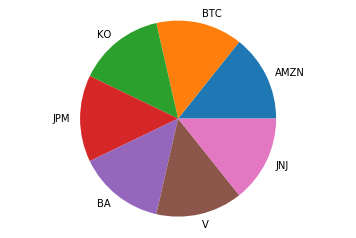

In [286]:
w1=np.linspace(1/7,1/7,7)
labels= 'AMZN','BTC','KO','JPM','BA','V','JNJ'
fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=labels)
ax1.axis('equal') 
plt.show()

### Portfelj 2: Minimum Variance
Strategija se temelji na optimizaciji udjela instrumenata tako da se maksimizira povrat (uz postavljenu donju granicu povrata) pritom minimizirajuci rizik tj varijancu. 
Za donji povrat uzimamo 10% na godišnjoj razini (želimo pobijediti S&P 500, a njen godišnji povrat kroz povijest je oko 8%, ali mi smo spremni na veci rizik). Posto gledamo podatke na mjesecnoj razini donju granicu treba prilagoditi.

Drugim rjecima: _FORMULE_

Za to ce nam biti potreban paket *cvxopt* (potrebno ga je dodatno skinuti i instalirati sto zna biti dugotrajno: 
http://cvxopt.org/download/index.html)

In [339]:
rg=0.10
r=((1+rg)**(1/12)-1)*100
n=7
r

0.7974140428903764

In [340]:
from statsmodels.stats.correlation_tools import cov_nearest
from cvxopt import matrix,solvers

data=[(povrat(ucitaj(p))) for p in port]
cv=cov_nearest(np.cov(data))
P=matrix(np.cov(data))

In [341]:
ravg=[z[p].mean() for p in port]
ravg=matrix(ravg)

In [342]:
G= matrix(np.concatenate((-np.transpose(np.array(ravg)), -np.identity(n)), 0))
h = matrix(np.concatenate((-np.ones((1,1))*r, np.zeros((n,1))), 0))
q = matrix(np.zeros((n, 1)))

In [343]:
A = matrix(1.0, (1,n))
b=matrix(1.0)
solvers.options['show_progress']=False
solvers.options['maxiters']=100
w2=solvers.qp(P, q, G, h, A, b)
for i in range(0,7):
    print(w2['x'][i])

4.65834336382758e-08
2.8079320074491786e-07
0.33477583209897793
0.055989989760665555
0.032222948677874896
0.1882526450407398
0.3887582570451074


In [344]:
w2=[4.65834336382758e-08,2.8079320074491786e-07,0.33477583209897793,
    0.055989989760665555,0.032222948677874896,0.1882526450407398,0.3887582570451074]

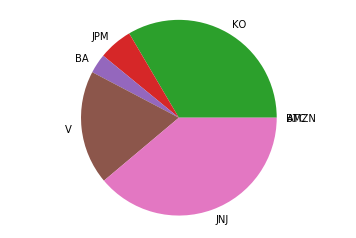

In [345]:
fig2, ax2 = plt.subplots()
ax2.pie(w2, labels=labels)
ax2.axis('equal') 
plt.show()

### Portfelj 3: Maximum Diversification
Nesto nesto

Nesto

## Testiranje rezultata 

## Zaključak